# Pyber Challenge

### 4.3 Loading and Reading CSV files

In [102]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd

# File to Load (Remember to change these)
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

### Merge the DataFrames

In [103]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the data table for preview
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


## Deliverable 1: Get a Summary DataFrame 

In [104]:
#  1. Get the total rides for each city type
#driver_count=pyber_data_df.set_index(["type"])["driver_count"]
total_driver_ride = pyber_data_df.groupby(["type"]).count()["ride_id"]
total_driver_ride
#total_driver_count.head()

type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64

In [131]:
# 2. Get the total drivers for each city type
total_driver_count = pyber_data_df.groupby(["type"]).sum()["driver_count"]
total_driver_count.head()

type
Rural         537
Suburban     8570
Urban       59602
Name: driver_count, dtype: int64

In [126]:
#  3. Get the total amount of fares for each city type
total_fare_count = pyber_data_df.groupby(["type"]).sum()["fare"]
total_fare_count.head()

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [127]:
#  4. Get the average fare per ride for each city type. 


In [134]:
ride_avg_fare = total_fare_count/total_driver_ride
ride_avg_fare.head()

type
Rural       34.623440
Suburban    30.970128
Urban       24.525772
dtype: float64

In [135]:
driver_avg_fare = total_fare_count/total_driver_count
driver_avg_fare

type
Rural       8.059460
Suburban    2.258615
Urban       0.668675
dtype: float64

In [122]:
# Determine the school type.
per_city_types = pyber_data_df.set_index(["type"])
per_city_types

,city,date,fare,ride_id,driver_count
type,,,,,
Urban,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5
Urban,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72
Urban,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57
Urban,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34
Urban,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46
...,...,...,...,...,...
Rural,Michaelberg,2019-04-29 17:04:39,13.38,8550365057598,6
Rural,Lake Latoyabury,2019-01-30 00:05:47,20.76,9018727594352,2
Rural,North Jaime,2019-02-10 21:03:50,11.11,2781339863778,1


In [123]:
#  6. Create a PyBer summary DataFrame. 
pyber_summary_df = pd.DataFrame(
          {"Total Rides": total_driver_ride, 
          "Total Drivers": total_driver_count, 
          "Total Fares": total_fare_count,
          "Ride Average": ride_avg_fare, 
          "Driver Average": driver_avg_fare})
pyber_summary_df

,Total Rides,Total Drivers,Total Fares,Ride Average,Driver Average
Rural,125,537,4327.93,34.623440,0.92475
Suburban,625,8570,19356.33,30.970128,0.92475
Urban,1625,59602,39854.38,24.525772,0.92475


In [112]:
#  7. Cleaning up the DataFrame. Delete the index name
pyber_summary_df.index.name = None
pyber_summary_df

,Total Rides,Total Drivers,Total Fares,Ride Average,Driver Average
Rural,125,537,4327.93,34.623440,8.059460
Suburban,625,8570,19356.33,30.970128,2.258615
Urban,1625,59602,39854.38,24.525772,0.668675


In [115]:
#  8. Format the columns.
# Format the Total School Budget and the Per Student Budget columns.
pyber_summary_df["Total Fares"] = pyber_summary_df["Total Fares"].map("${:,.2f}".format)
pyber_summary_df["Ride Average"] = pyber_summary_df["Ride Average"].map("${:,.2f}".format)
pyber_summary_df["Driver Average"] = pyber_summary_df["Driver Average"].map("${:,.2f}".format)

In [116]:
pyber_summary_df

,Total Rides,Total Drivers,Total Fares,Ride Average,Driver Average
Rural,125,537,"$4,327.93",$34.62,$8.06
Suburban,625,8570,"$19,356.33",$30.97,$2.26
Urban,1625,59602,"$39,854.38",$24.53,$0.67


## Deliverable 2.  Create a multiple line plot that shows the total weekly of the fares for each type of city.

In [148]:
# 1. Read the merged DataFrame
pyber_data_df

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban
...,...,...,...,...,...,...
2370,Michaelberg,2019-04-29 17:04:39,13.38,8550365057598,6,Rural
2371,Lake Latoyabury,2019-01-30 00:05:47,20.76,9018727594352,2,Rural
2372,North Jaime,2019-02-10 21:03:50,11.11,2781339863778,1,Rural
2373,West Heather,2019-05-07 19:22:15,44.94,4256853490277,4,Rural


In [175]:
# 2. Using groupby() to create a new DataFrame showing the sum of the fares 
#  for each date where the indices are the city type and date.
Date_fare = pyber_data_df.groupby(["city","type","date",]).sum(["fare"])
Date_fare


fare        ride_id  driver_count
city         type  date                                                   
Amandaburgh  Urban 2019-01-02 09:57:04  33.06  6330658179518            12
                   2019-01-11 02:22:07  29.24  7279902884763            12
                   2019-01-13 16:04:10  23.35  9975084532253            12
                   2019-01-21 04:12:54   9.26  5528427024492            12
                   2019-01-29 23:28:12  41.06  4296858665195            12
...                                       ...            ...           ...
Williamsview Urban 2019-04-15 16:09:08  44.74  2759396812039            46
                   2019-04-16 08:23:02  20.38  8227750445178            46
                   2019-04-18 02:07:15  39.79  8745531941706            46
                   2019-04-26 00:30:10  20.89  2565031924407            46
                   2019-05-04 14:56:45  32.80  2677734881755            46

[2375 rows x 3 columns]

In [176]:
# 3. Reset the index on the DataFrame you created in #1. This is needed to use the 'pivot()' function.
# df = df.reset_index()
Date_fare=Date_fare.reset_index()

In [177]:
# 4. Create a pivot table with the 'date' as the index, the columns ='type', and values='fare' 
# to get the total fares for each type of city by the date. 
table = pd.pivot_table( data=Date_fare, 
                        index=['date'], 
                        columns=['type'], 
                        values='fare',
                        aggfunc='mean')
table

type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75
...,...,...,...
2019-05-08 04:20:00,NaN,NaN,21.99
2019-05-08 04:39:49,NaN,NaN,18.45
2019-05-08 07:29:01,NaN,NaN,18.55


In [192]:
# 5. Create a new DataFrame from the pivot table DataFrame using loc on the given dates, '2019-01-01':'2019-04-29'.

#twenty_nineteen=table.loc[('2019-01-01':'2019-04-29')]
start_date = '2019-01-01'
end_date = '2019-04-29'
twenty_nineteen = (pyber_data_df['date'] > start_date) & (pyber_data_df['date'] <= end_date)
New_df=pyber_data_df.loc[twenty_nineteen]
New_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [204]:
#New Pivot table with 2019 given dates
table = pd.pivot_table( data=New_df, 
                        index=['date'], 
                        columns=['type'], 
                        values='fare',
                        aggfunc='mean')
table

type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75
...,...,...,...
2019-04-28 14:28:36,NaN,NaN,11.46
2019-04-28 16:29:16,NaN,NaN,36.42
2019-04-28 17:26:52,NaN,NaN,31.43


In [205]:
# 6. Set the "date" index to datetime datatype. This is necessary to use the resample() method in Step 8.
# df.index = pd.to_datetime(df.index)
table.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2196 entries, 2019-01-01 00:08:16 to 2019-04-28 19:35:03
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rural     114 non-null    float64
 1   Suburban  573 non-null    float64
 2   Urban     1509 non-null   float64
dtypes: float64(3)
memory usage: 68.6+ KB


In [207]:
table.index=pd.to_datetime(table.index)
table=table.resample("w").sum()
table

type,Rural,Suburban,Urban
date,,,
2019-01-06,187.92,721.60,1661.68
2019-01-13,67.65,1105.13,2050.43
2019-01-20,306.00,1218.20,1939.02
2019-01-27,179.69,1203.28,2129.51
2019-02-03,333.08,1042.79,2086.94
2019-02-10,115.80,974.34,2162.64
2019-02-17,95.82,1045.50,2235.07
2019-02-24,419.06,1412.74,2466.29
2019-03-03,175.14,858.46,2218.20


In [ ]:
#Check the data frame


In [17]:
# 7. Check that the datatype for the index is datetime using df.info()


In [18]:
# 8. Create a new DataFrame using the "resample()" function by week 'W' and get the sum of the fares for each week.


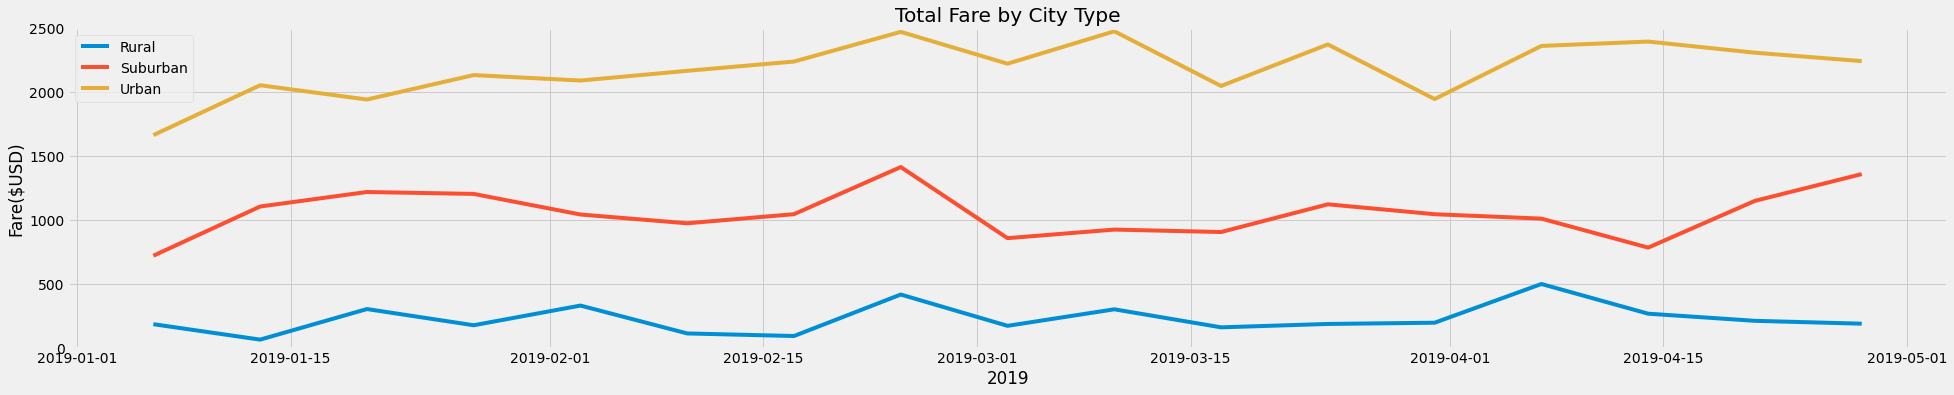

In [263]:
# 8. Using the object-oriented interface method, plot the resample DataFrame using the df.plot() function. 

# Import the style from Matplotlib.
from matplotlib import style
# Use the graph style fivethirtyeight.
style.use('fivethirtyeight')

# Set the x-axis to a list of strings for each month.
x_labels = ["Rural", "Suburban", "Urban"]

# Set the y-axis to a list of floats as the total fare in US dollars accumulated for each month.
x_axis = ["Jan", "Feb", "March", "April"]

# Create the plot and add a label for the legend.
plt.plot(table, label=x_labels)
# Create labels for the x and y axes.
plt.xlabel("2019")
plt.ylabel("Fare($USD)")
# Set the y limit between 0 and 2500.
plt.ylim(0, 2500)
# Create a title.
plt.title("Total Fare by City Type")
#Input the style
plt.style.use('fivethirtyeight')
#Increase the size of the plot
plt.rcParams["figure.figsize"] = (30,5.5)
# Add the legend.
plt.legend()



In [265]:
from IPython.display import Image
Image(filename='plt') 

ValueError: Cannot embed the 'plt' image format